In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_df = pd.read_csv('/content/drive/My Drive/fake-news/train.csv')
test_df= pd.read_csv('/content/drive/My Drive/fake-news/test.csv')



In [4]:
train_df

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [5]:
test_df

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...
...,...,...,...,...
5195,25995,The Bangladeshi Traffic Jam That Never Ends - ...,Jody Rosen,Of all the dysfunctions that plague the world’...
5196,25996,John Kasich Signs One Abortion Bill in Ohio bu...,Sheryl Gay Stolberg,WASHINGTON — Gov. John Kasich of Ohio on Tu...
5197,25997,"California Today: What, Exactly, Is in Your Su...",Mike McPhate,Good morning. (Want to get California Today by...
5198,25998,300 US Marines To Be Deployed To Russian Borde...,NaN,« Previous - Next » 300 US Marines To Be Deplo...


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


Preprocessing

In [7]:
#filling null values

train_df.dropna(inplace=True)

In [8]:
train_df

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [9]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from string import punctuation

# Download NLTK resources (stopwords and punkt)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [10]:
# Tokenization, normalization, stemming, lemmatization, removing punctuation and stopwords
stop_words = set(stopwords.words('english'))
porter_stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [11]:
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text.lower())  # Convert to lowercase during tokenization

    # Remove punctuation and stopwords
    tokens = [token for token in tokens if token.isalpha() and token not in punctuation and token not in stop_words]

    # Stemming and Lemmatization
    tokens = [porter_stemmer.stem(lemmatizer.lemmatize(token)) for token in tokens]

    return ' '.join(tokens)

In [12]:

# Apply preprocessing to each row in the 'text' column
train_df['processed_text'] = train_df['text'].apply(preprocess_text)

In [15]:
train_df[['text', 'processed_text']]

,text,processed_text
0,House Dem Aide: We Didn’t Even See Comey’s Let...,hous dem aid even see comey letter jason chaff...
1,Ever get the feeling your life circles the rou...,ever get feel life circl roundabout rather hea...
2,"Why the Truth Might Get You Fired October 29, ...",truth might get fire octob tension intellig an...
3,Videos 15 Civilians Killed In Single US Airstr...,video civilian kill singl u airstrik identifi ...
4,Print \nAn Iranian woman has been sentenced to...,print iranian woman sentenc six year prison ir...
...,...,...
20795,Rapper T. I. unloaded on black celebrities who...,rapper unload black celebr met donald trump el...
20796,When the Green Bay Packers lost to the Washing...,green bay packer lost washington redskin week ...
20797,The Macy’s of today grew from the union of sev...,maci today grew union sever great name america...
20798,"NATO, Russia To Hold Parallel Exercises In Bal...",nato russia hold parallel exercis balkan press...


In [16]:
!pip install wordcloud


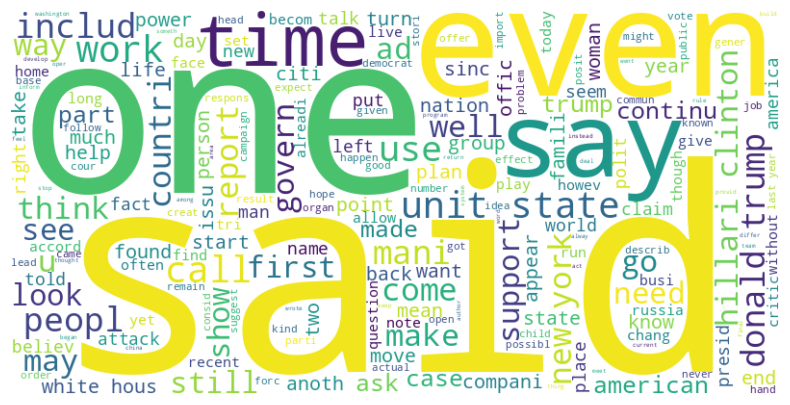

In [18]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Combine all preprocessed texts into a single string
all_processed_text = ' '.join(train_df['processed_text'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_processed_text)

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

plt.show()


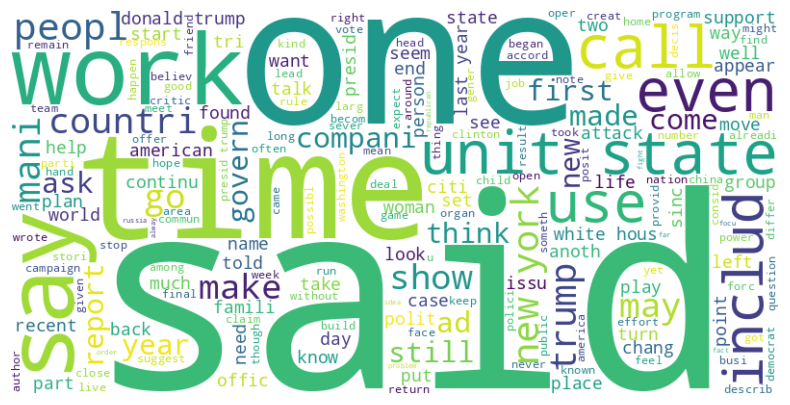

In [19]:
# Combine preprocessed texts for label 0
text_label_0 = ' '.join(train_df[train_df['label'] == 0]['processed_text'])

# Generate a word cloud for label 0
wordcloud_label_0 = WordCloud(width=800, height=400, background_color='white').generate(text_label_0)

# Plot the WordCloud image for label 0
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_label_0, interpolation='bilinear')
plt.axis('off')
plt.show()

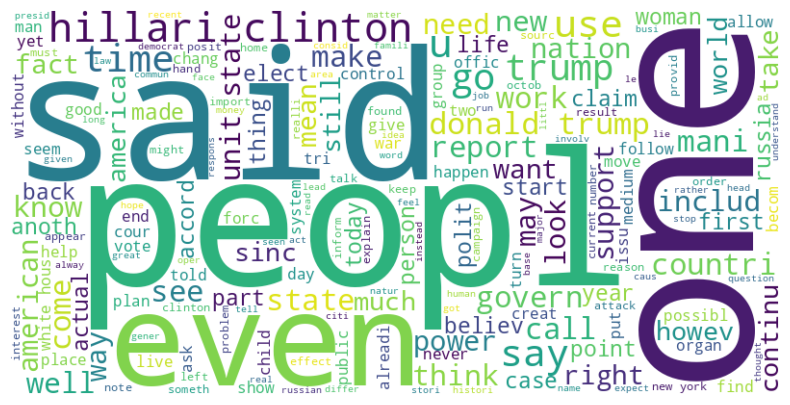

In [20]:
# Combine preprocessed texts for label 1
text_label_1 = ' '.join(train_df[train_df['label'] == 1]['processed_text'])

# Generate a word cloud for label 1
wordcloud_label_1 = WordCloud(width=800, height=400, background_color='white').generate(text_label_1)

# Plot the WordCloud image for label 1
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_label_1, interpolation='bilinear')
plt.axis('off')
plt.show()

In [21]:
train_df

,id,title,author,text,label,processed_text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,hous dem aid even see comey letter jason chaff...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,ever get feel life circl roundabout rather hea...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,truth might get fire octob tension intellig an...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,video civilian kill singl u airstrik identifi ...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,print iranian woman sentenc six year prison ir...
...,...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0,rapper unload black celebr met donald trump el...
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0,green bay packer lost washington redskin week ...
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0,maci today grew union sever great name america...
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1,nato russia hold parallel exercis balkan press...


In [25]:
!pip install pyvis


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 51.5 MB/s eta 0:00:00


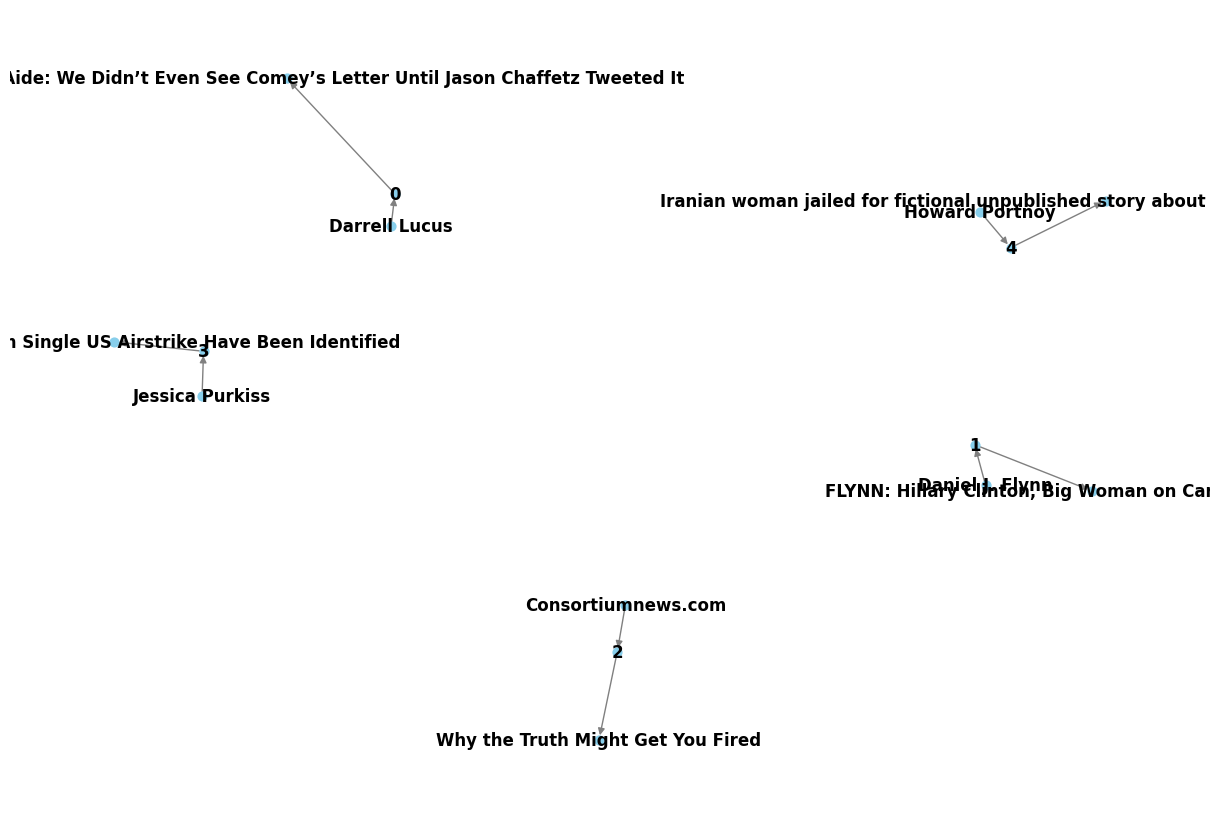

In [38]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges based on the DataFrame
for index, row in train_df[:5].iterrows():
    G.add_node(row['id'], label=row['label'])
    G.add_node(row['author'], label='author')
    G.add_edge(row['author'], row['id'])
    G.add_edge(row['id'], row['title'])

# Plot the knowledge graph with Fruchterman-Reingold layout
plt.figure(figsize=(12, 8))
pos = nx.fruchterman_reingold_layout(G)  # Layout algorithm for larger graphs
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=40, node_color='skyblue', font_size=12, edge_color='gray')
plt.show()


In [39]:
train_df

,id,title,author,text,label,processed_text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,hous dem aid even see comey letter jason chaff...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,ever get feel life circl roundabout rather hea...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,truth might get fire octob tension intellig an...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,video civilian kill singl u airstrik identifi ...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,print iranian woman sentenc six year prison ir...
...,...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0,rapper unload black celebr met donald trump el...
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0,green bay packer lost washington redskin week ...
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0,maci today grew union sever great name america...
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1,nato russia hold parallel exercis balkan press...


In [46]:
import tensorflow as tf
from tensorflow.keras import layers, Model
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

In [45]:
# Assuming your DataFrame has 'processed_text' and 'label' columns
texts = train_df['processed_text'].values
labels = train_df['label'].values


In [47]:
# Split the data into training and testing sets
texts_train, texts_test, labels_train, labels_test = train_test_split(texts, labels, test_size=0.2, random_state=42)


In [48]:
# Use TfidfVectorizer to convert text data to numerical vectors
vectorizer = TfidfVectorizer(max_features=300)  # Replace with your desired number of features
texts_train_vectorized = vectorizer.fit_transform(texts_train).toarray()
texts_test_vectorized = vectorizer.transform(texts_test).toarray()


In [49]:
# Convert your training and testing data to TensorFlow tensors
x_train = tf.constant(texts_train_vectorized, dtype=tf.float32)
y_train = tf.constant(labels_train, dtype=tf.float32)
x_test = tf.constant(texts_test_vectorized, dtype=tf.float32)
y_test = tf.constant(labels_test, dtype=tf.float32)


In [50]:
x_train

<tf.Tensor: shape=(14628, 300), dtype=float32, numpy=
array([[0.09293508, 0.        , 0.        , ..., 0.13920029, 0.        ,
        0.03630189],
       [0.        , 0.        , 0.        , ..., 0.06864017, 0.        ,
        0.        ],
       [0.        , 0.05251034, 0.10956531, ..., 0.        , 0.05198891,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.20830998, 0.        ,
        0.        ],
       [0.05338299, 0.        , 0.        , ..., 0.07995827, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)>

In [51]:
x_train.shape

TensorShape([14628, 300])

In [52]:
y_train.shape

TensorShape([14628])

In [53]:
x_test.shape

TensorShape([3657, 300])

In [54]:
y_test.shape

TensorShape([3657])

In [58]:
import tensorflow as tf
from tensorflow.keras import layers, Model

# Self-Attention Layer
class SelfAttention(tf.keras.layers.Layer):
    def __init__(self, units):
        super(SelfAttention, self).__init__()
        self.units = units
        self.attention = layers.Attention(use_scale=True)

    def call(self, x):
        return self.attention([x, x])

# Pyramidal Multiscale Joint Attention Layer
class PyramidalAttention(tf.keras.layers.Layer):
    def __init__(self, units):
        super(PyramidalAttention, self).__init__()
        self.units = units
        self.attention = layers.Attention(use_scale=True)

    def call(self, x):
        return self.attention([x, x])

# ...

# Adaptive Fusion Network Layer
class AdaptiveFusionNetwork(tf.keras.layers.Layer):
    def __init__(self, units):
        super(AdaptiveFusionNetwork, self).__init__()
        self.units = units
        self.dense1 = layers.Dense(units, activation='relu')
        self.dense2 = layers.Dense(units, activation='relu')

    def call(self, x1, x2):
        x1 = self.dense1(x1)
        x2 = self.dense2(x2)
        return tf.concat([x1, x2], axis=-1)

# Restricted Boltzmann Machine Layer
class RBM(tf.keras.layers.Layer):
    def __init__(self, visible_units, hidden_units):
        super(RBM, self).__init__()
        self.visible_units = visible_units
        self.hidden_units = hidden_units
        self.weights_rbm = self.add_weight(shape=(visible_units, hidden_units),
                                           initializer='random_normal',
                                           trainable=True,
                                           name='weights_rbm')
        self.visible_bias_rbm = self.add_weight(shape=(visible_units,),
                                                initializer='random_normal',
                                                trainable=True,
                                                name='visible_bias_rbm')
        self.hidden_bias_rbm = self.add_weight(shape=(hidden_units,),
                                               initializer='random_normal',
                                               trainable=True,
                                               name='hidden_bias_rbm')

    def call(self, x):
        hidden = tf.nn.sigmoid(tf.matmul(x, self.weights_rbm) + self.hidden_bias_rbm)
        reconstructed = tf.nn.sigmoid(tf.matmul(hidden, tf.transpose(self.weights_rbm)) + self.visible_bias_rbm)
        return reconstructed

# Feature Extraction Model with Self-Attention, Pyramidal Attention, Adaptive Fusion, and RBM
class FeatureExtractionModel(Model):
    def __init__(self, input_size, hidden_size):
        super(FeatureExtractionModel, self).__init__()
        self.self_attention = SelfAttention(hidden_size)
        self.pyramidal_attention = PyramidalAttention(hidden_size)
        self.adaptive_fusion_network = AdaptiveFusionNetwork(hidden_size)
        self.rbm = RBM(hidden_size * 2, hidden_size)  # Adjust input size for RBM

    def call(self, x):
        x_self_attention = self.self_attention(x)
        x_pyramidal_attention = self.pyramidal_attention(x)

        # Pass both x_self_attention and x_pyramidal_attention as separate arguments
        x_fusion = self.adaptive_fusion_network(x_self_attention, x_pyramidal_attention)
        x_rbm = self.rbm(x_fusion)
        return x_rbm

# ...

# Instantiate the model
input_size = 300
hidden_size = 128
model = FeatureExtractionModel(input_size, hidden_size)

# Build the model
sample_input = tf.ones((1, input_size))  # Use a sample input to infer the input shape
model(sample_input)

# Print model summary
model.summary()


Model: "feature_extraction_model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 self_attention_6 (SelfAtte  multiple                  1         
 ntion)                                                          
                                                                 
 pyramidal_attention_6 (Pyr  multiple                  1         
 amidalAttention)                                                
                                                                 
 adaptive_fusion_network_6   multiple                  77056     
 (AdaptiveFusionNetwork)                                         
                                                                 
 rbm_6 (RBM)                 multiple                  33152     
                                                                 
Total params: 110210 (430.51 KB)
Trainable params: 110210 (430.51 KB)
Non-trainable params: 0 (0.00 Byte)


In [60]:
import tensorflow as tf


# Instantiate the model
input_size = 300
hidden_size = 128
model = FeatureExtractionModel(input_size, hidden_size)

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])  # Adjust optimizer, loss, and metrics as needed

# Train the model
batch_size = 32
epochs = 10  # Adjust the number of epochs as needed

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))


Epoch 1/10
458/458 [==============================] - 3s 5ms/step - loss: 0.2460 - accuracy: 0.0011 - val_loss: 0.2444 - val_accuracy: 0.0000e+00
Epoch 2/10
458/458 [==============================] - 2s 4ms/step - loss: 0.1889 - accuracy: 6.8362e-05 - val_loss: 0.1487 - val_accuracy: 0.0000e+00
Epoch 3/10
458/458 [==============================] - 2s 4ms/step - loss: 0.1348 - accuracy: 0.0000e+00 - val_loss: 0.1258 - val_accuracy: 0.0000e+00
Epoch 4/10
458/458 [==============================] - 1s 3ms/step - loss: 0.1152 - accuracy: 0.0000e+00 - val_loss: 0.1155 - val_accuracy: 0.0000e+00
Epoch 5/10
458/458 [==============================] - 1s 3ms/step - loss: 0.1052 - accuracy: 0.0000e+00 - val_loss: 0.1075 - val_accuracy: 0.0000e+00
Epoch 6/10
458/458 [==============================] - 1s 3ms/step - loss: 0.0982 - accuracy: 0.0000e+00 - val_loss: 0.1039 - val_accuracy: 0.0000e+00
Epoch 7/10
458/458 [==============================] - 1s 3ms/step - loss: 0.0937 - accuracy: 0.0000e+00 